# EDA

In [64]:
# set up
import pandas as pd
import numpy as np
import os
import sys
from matplotlib import pyplot as plt
import seaborn as sns

data_path = r"c:\users\ejaeb\documents\kaggle\house-prices-advanced-regression-techniques\data"
sys.path.append(data_path)

pd.set_option('display.max_columns', None)

In [20]:
df_train = pd.read_csv(data_path + "\\" + "train.csv", index_col=0)
df_test = pd.read_csv(data_path + "\\" + "test.csv", index_col=0)

display(df_train.head())

print("train size:", df_train.shape)
print("test size:", df_test.shape)

X_train = df_train.drop('SalePrice', axis=1)
y_train = df_train['SalePrice']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


train size: (1460, 80)
test size: (1459, 79)


## data exploration

Intuitively speaking, I believe there are several key factors that determine the price of the house:

- location
- size/number of rooms
- condition

I will choose what I consider the key variables to predict the price of the house and add additional variables after building the baseline model. 

### size/number of rooms

We have many area variables but I consider the following to be the most important in determining the house price: 

- 'LotArea',
- 'TotalBsmtSF',
- '1stFlrSF',
- '2ndFlrSF',
- 'GrLivArea',
- 'GarageArea'

With the number of rooms:

- 'TotRmsAbvGrd',
- 'BedroomAbvGr',
- 'KitchenAbvGr',
- 'BsmtFullBath',
- 'BsmtHalfBath',
- 'FullBath',
- 'HalfBath'

We have bathrooms which seems to be split into half and full bathroom, something for us to look more closely.

In [38]:
# size_var = [
#     'LotArea',
#     'TotalBsmtSF',
#     '1stFlrSF',
#     '2ndFlrSF',
#     'GrLivArea',
#     'GarageArea',
#     'TotRmsAbvGrd',
#     'BedroomAbvGr',
#     'KitchenAbvGr',
#     'BsmtFullBath',
#     'BsmtHalfBath',
#     'FullBath',
#     'HalfBath',
#     'LowQualFinSF',
#     'Fireplaces',
#     'WoodDeckSF',
#     'OpenPorchSF',
#     'EnclosedPorch',
#     '3SsnPorch',
#     'ScreenPorch',
#     'PoolArea'
# ]

#### size variables 

In [74]:
size_var = [
    'LotArea',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
    'GarageArea'
]

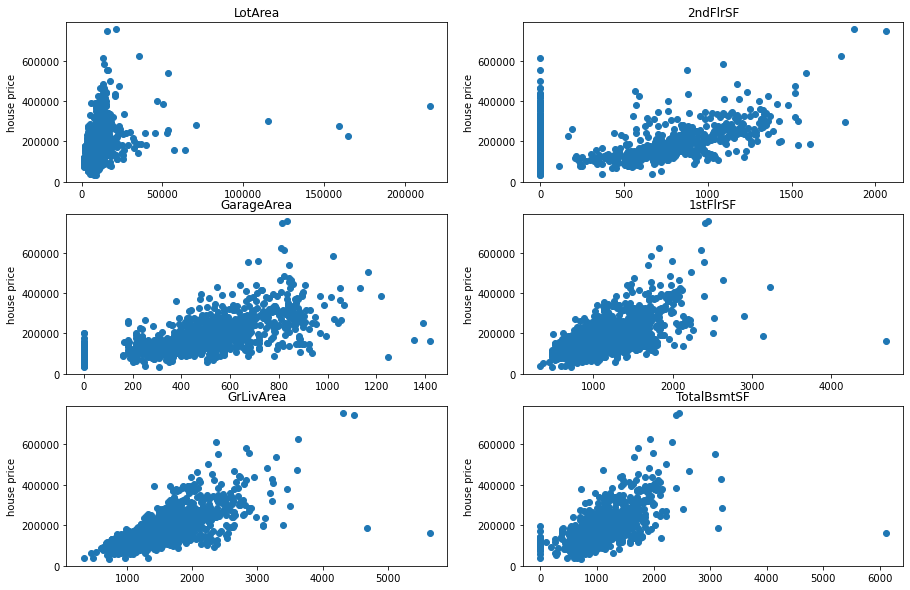

In [49]:
# HOUSE PRICES vs SIZE VARIABLES
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,10))

for i in [0,1]:
    for j in [0,1,2]:
        ax[j,i].scatter(X_train[size_var[i*3 - j]], y_train)
        ax[j,i].set_title(size_var[i*3 - j])

Key things to note:

- We can observe a strong linear relationship 
- for garage, basement, and 2nd floor, we have a number of houses where the values are zero
    - approx. 57% of houses do not have 2nd floor. Including the 2nd floor as the value will be misleading for the model 
    - larger number of floors have house price more spread out
- **two anomalous points observed in the total surface area** (ID 524, 1299)

Text(0.5, 1.0, 'histogram of total area')

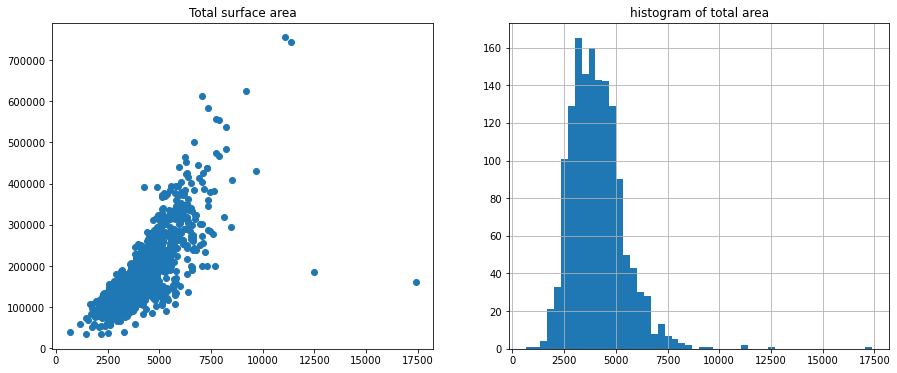

In [73]:
# TOTAL SURFACE AREA
fig, ax = plt.subplots(figsize=(15,6), ncols=2)
ax[0].scatter(X_train[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea']].sum(axis=1), y_train)
ax[0].set_title("Total surface area")

X_train[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea']].sum(axis=1).hist(ax=ax[1], bins=50)
ax[1].set_title("histogram of total area")

houses without the floors


TotalBsmtSF    0.025342
1stFlrSF       0.000000
2ndFlrSF       0.567808
GarageArea     0.055479
dtype: float64

houses count with floors


3    812
4    621
2     27
dtype: int64

Text(0.5, 0, 'number of floors')

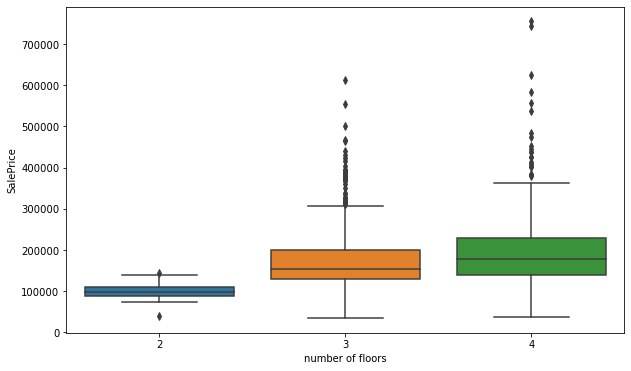

In [87]:
# HOUSES WITHOUT THE FEATURES
print("houses without the floors")
display((X_train[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea']] == 0).sum(axis=0)/len(X_train))

print("houses count with floors")
display((X_train[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea']] != 0).sum(axis=1).value_counts())

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.boxplot(
    x=(X_train[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea']] != 0).sum(axis=1), 
    y=y_train
)
ax.set_xlabel("number of floors")

In [70]:
# SUSPECTED ANOMALIES
X_train.loc[(X_train[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea']].sum(axis=1) > 10000) & (y_train < 300000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial


#### no. of rooms

Things to note:

- bathroom:
    - There are "half" bathroom -> treat them as 0.5 bathroom 
    - basement toilets
    - just use total number of toilets (trend observed)
    - too small numbers for toilet numbers greater than 4 => if greater than 4, set it equal to 4
- kitchen
    - 95% of houses have 1 kitchen -> insignificant variable
- bedroom
    - no clear trend
- total rooms above ground

In [75]:
room_var = [    
    'TotRmsAbvGrd',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath'
]

<AxesSubplot:>

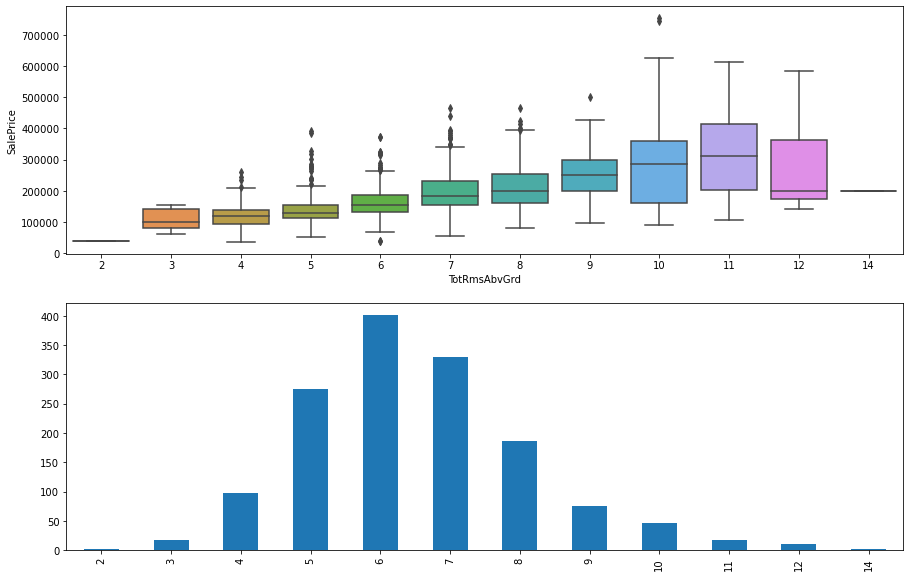

In [93]:
# total number of rooms
fig, ax = plt.subplots(figsize=(15,10), nrows=2)
sns.boxplot(
    x=X_train['TotRmsAbvGrd'],
    y=y_train, 
    ax=ax[0]
)

X_train['TotRmsAbvGrd'].value_counts(sort=False).plot.bar(ax=ax[1])

<AxesSubplot:>

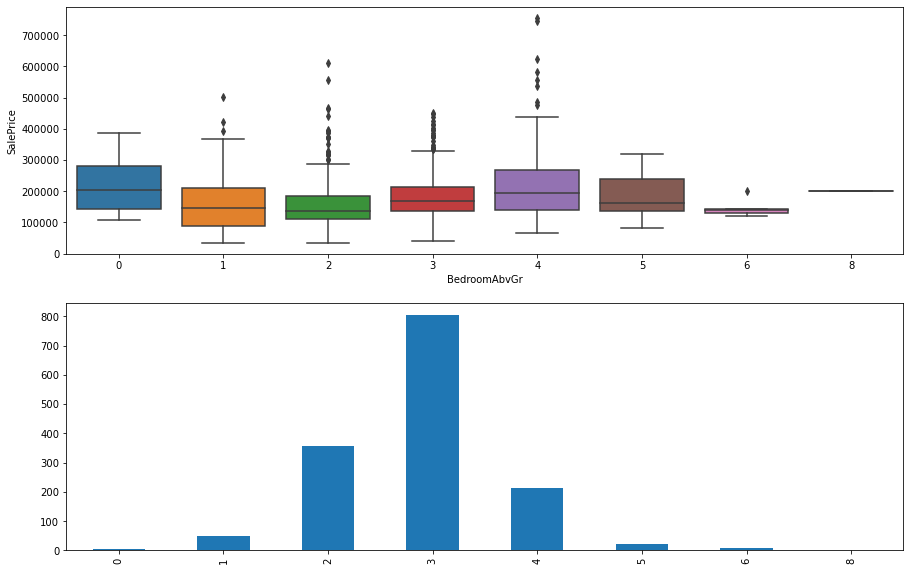

In [94]:
# bedrooms
fig, ax = plt.subplots(figsize=(15,10), nrows=2)
sns.boxplot(
    x=X_train['BedroomAbvGr'],
    y=y_train, 
    ax=ax[0]
)

X_train['BedroomAbvGr'].value_counts(sort=False).plot.bar(ax=ax[1])

<AxesSubplot:>

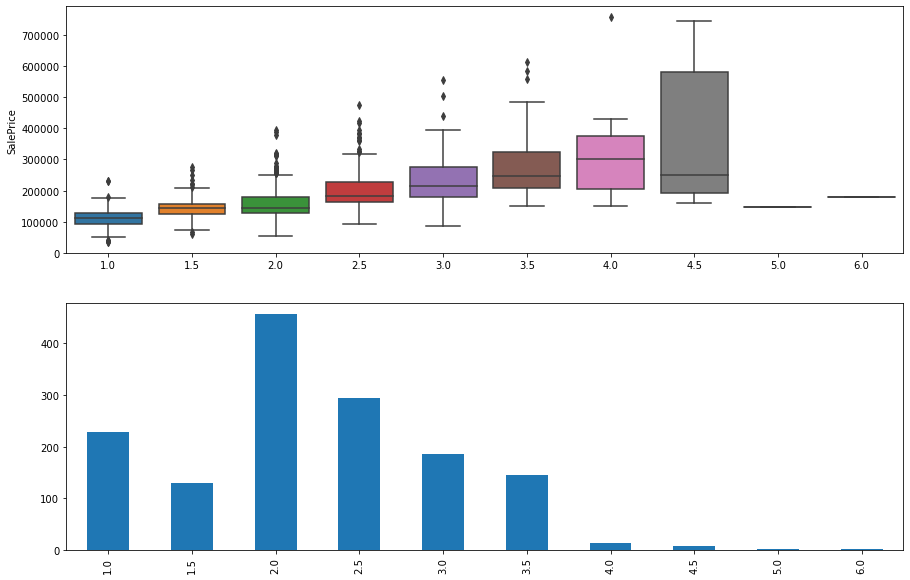

In [103]:
# bathroom
fig, ax = plt.subplots(figsize=(15,10), nrows=2)
total_bathroom = X_train['BsmtFullBath'] + 0.5*X_train['BsmtHalfBath'] + X_train['FullBath'] + 0.5*X_train['HalfBath']
sns.boxplot(
    x=total_bathroom,
    y=y_train, 
    ax=ax[0]
)
total_bathroom.value_counts().sort_index().plot.bar(ax[1])